# Lead Scoring Case Study 

### Problem Statement 
Build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.  target lead conversion rate to be around 80%.

 

### Goals of the Case Study
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
import warnings
warnings.filterwarnings("ignore") 

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
path  = r"D:\Learning\Machine Learning\Lead Scoring Assignment\\"  
#path = r"C:\Users\prabinkumart\Desktop\Classes\Courses\Machine learning 1\lead scoring case study\Lead Scoring Assignment\\"

In [3]:
Lead_df = pd.read_csv(path + "Leads.csv")


In [4]:
Lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
Lead_df.shape

(9240, 37)

In [6]:
# we have 9240 data points and 37 features to start with 

In [7]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
Lead_df. describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Step 1  : Data Preparation 

In [9]:
Lead_df_features_all=list(Lead_df.columns)
Lead_df_features_all

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [10]:
# Check the data 
pd.set_option('display.max_columns',500 )
Lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [11]:
Lead_df_backup=Lead_df.copy()

### Handling Missing Values 

In [12]:
round((Lead_df.isnull().sum()/len(Lead_df) * 100),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

In [13]:
# there are lot of columns with value 'select', which basically means they are null . converting 'Select' to null 
Lead_df=Lead_df.replace('Select', np.nan)

In [14]:
round((Lead_df.isnull().sum()/len(Lead_df) * 100),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [15]:
# Dropping columns with High Missing values (45% and more )
# todrop1=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score'
#        ,'Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education']
todrop1 = Lead_df.columns[Lead_df.isnull().sum()/Lead_df.shape[0]*100>45]
Lead_df.drop(todrop1, axis = 1, inplace = True)


In [16]:
Lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of 

In [17]:
round((Lead_df.isnull().sum()/len(Lead_df) * 100),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [18]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [19]:
Lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [20]:
# Check the distrubution of some of the variable 
from collections import Counter
cols_m = ['Lead Origin', 'Lead Source', 'Converted',
       'Do Not Email','Do Not Call','Search','Newspaper Article',
       'X Education Forums', 'Digital Advertisement','Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content',
       'Get updates on DM Content','I agree to pay the amount through cheque',
       'Last Activity', 'A free copy of Mastering The Interview',
       'Last Notable Activity','City','Specialization','Tags','What matters most to you in choosing a course',
       'What is your current occupation','Country']
for i in cols_m:
    x = Counter(Lead_df[i])
    print("\n", i," : \n" ,x)
    print("--------------------------------------------------------------------------------------")


 Lead Origin  : 
 Counter({'Landing Page Submission': 4886, 'API': 3580, 'Lead Add Form': 718, 'Lead Import': 55, 'Quick Add Form': 1})
--------------------------------------------------------------------------------------

 Lead Source  : 
 Counter({'Google': 2868, 'Direct Traffic': 2543, 'Olark Chat': 1755, 'Organic Search': 1154, 'Reference': 534, 'Welingak Website': 142, 'Referral Sites': 125, 'Facebook': 55, nan: 36, 'bing': 6, 'google': 5, 'Click2call': 4, 'Social Media': 2, 'Live Chat': 2, 'Press_Release': 2, 'blog': 1, 'Pay per Click Ads': 1, 'WeLearn': 1, 'welearnblog_Home': 1, 'youtubechannel': 1, 'testone': 1, 'NC_EDM': 1})
--------------------------------------------------------------------------------------

 Converted  : 
 Counter({0: 5679, 1: 3561})
--------------------------------------------------------------------------------------

 Do Not Email  : 
 Counter({'No': 8506, 'Yes': 734})
-----------------------------------------------------------------------------------

In [21]:

### Below mentioned columns are dominated by a single value due to less variance they are meainingless 
## for our prediction model so removing those columns 

to_drop2 = ['Do Not Call','Search','Newspaper Article',
       'X Education Forums', 'Digital Advertisement','Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content',
       'Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course']

Lead_df.drop(to_drop2, axis = 1, inplace = True)

In [22]:
## checking the remaining missing values 
round((Lead_df.isnull().sum()/len(Lead_df) * 100),2).sort_values(ascending=False).head(10)

City                               39.71
Specialization                     36.58
Tags                               36.29
What is your current occupation    29.11
Country                            26.63
Page Views Per Visit                1.48
TotalVisits                         1.48
Last Activity                       1.11
Lead Source                         0.39
Converted                           0.00
dtype: float64

In [23]:
# Imputing Columns with a random value  pick from that column .. 
columns_to_impute=['What is your current occupation','Country','Specialization','Tags','City']

for col in columns_to_impute:
  np.random.seed(10)
  s  = Lead_df[col].value_counts(normalize=True)
  miss  = Lead_df[col].isnull()
  Lead_df.loc[miss,col] = np.random.choice(s.index, size=len(Lead_df[miss]), p=s.values)



In [24]:
columns_to_impute=['What is your current occupation','Country','Specialization','Tags','City']
for i in columns_to_impute:
    x = Counter(Lead_df[i])
    print("\n", i," : \n" ,x)
    print("--------------------------------------------------------------------------------------")


 What is your current occupation  : 
 Counter({'Unemployed': 7909, 'Working Professional': 986, 'Student': 296, 'Other': 25, 'Housewife': 13, 'Businessman': 11})
--------------------------------------------------------------------------------------

 Country  : 
 Counter({'India': 8849, 'United States': 91, 'United Arab Emirates': 73, 'Singapore': 33, 'Saudi Arabia': 33, 'United Kingdom': 21, 'Australia': 15, 'Qatar': 13, 'Oman': 10, 'Bahrain': 10, 'France': 9, 'Hong Kong': 8, 'unknown': 8, 'South Africa': 6, 'Kuwait': 5, 'Nigeria': 5, 'Belgium': 4, 'China': 4, 'Canada': 4, 'Germany': 4, 'Italy': 4, 'Bangladesh': 4, 'Sweden': 3, 'Russia': 2, 'Ghana': 2, 'Netherlands': 2, 'Switzerland': 2, 'Asia/Pacific Region': 2, 'Uganda': 2, 'Liberia': 2, 'Denmark': 2, 'Philippines': 2, 'Sri Lanka': 1, 'Kenya': 1, 'Tanzania': 1, 'Malaysia': 1, 'Vietnam': 1, 'Indonesia': 1})
--------------------------------------------------------------------------------------

 Specialization  : 
 Counter({'Finance 

In [25]:
round((Lead_df.isnull().sum()/len(Lead_df) * 100),2).sort_values(ascending=False).head(5)

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
Lead Number             0.00
dtype: float64

In [26]:
## Deleting rows with nans 
Lead_df= Lead_df.dropna(how = "any", axis = 0)

In [27]:
## Calculation the loss 
Lead_df.shape

(9074, 19)

 We are down to 9240 data points with 19-2=17 features from 9270 data points and 37-2 features (lead number and propectus id are unique identifiers)

#### Outlier Check 

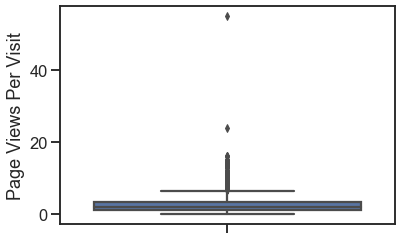

In [28]:
sns.set(style="ticks", context="talk")
# plt.style.use("dark_background")

sns.boxplot(y=Lead_df['Page Views Per Visit'])

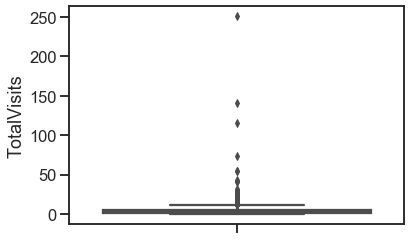

In [29]:
sns.boxplot(y=Lead_df['TotalVisits'])


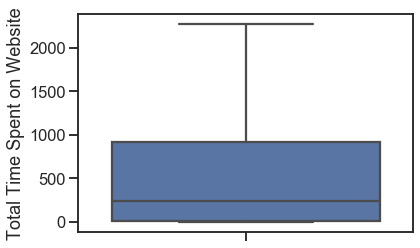

In [30]:
sns.boxplot(y=Lead_df['Total Time Spent on Website'])

In [31]:
# Checking for outliers 
Lead_df.describe(percentiles=[.01, .1, .5,  .99, .999])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
1%     580313.730000     0.000000     0.000000                     0.000000   
10%    586310.100000     0.000000     0.000000                     0.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
99%    659563.350000     1.000000    17.000000                  1839.000000   
99.9%  660615.416000     1.000000    31.854000                  2111.927000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
1%                 0.000000  
10%                0.000000  
50%                2.000000  
99%                9.000000  
99.9%             14.463500  
max               55.000000

In [32]:
## there are some outliers in total visits column and page views per visit as well . we need to remove those 
print("Total " ,len(Lead_df[(Lead_df.TotalVisits >= Lead_df.TotalVisits.quantile(0.999))])," outliered Columns removed")

Total  10  outliered Columns removed


In [33]:
Lead_df=Lead_df[(Lead_df.TotalVisits < Lead_df.TotalVisits.quantile(0.999))]

In [34]:
# Checking for outliers 
Lead_df.describe(percentiles=[.01, .1, .5,  .99, .999])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9064.000000  9064.000000  9064.000000                  9064.000000   
mean   617035.493049     0.378861     3.366284                   482.833407   
std     23352.455178     0.485130     3.420282                   545.313617   
min    579533.000000     0.000000     0.000000                     0.000000   
1%     580313.630000     0.000000     0.000000                     0.000000   
10%    586307.300000     0.000000     0.000000                     0.000000   
50%    615282.500000     0.000000     3.000000                   246.000000   
99%    659563.850000     1.000000    16.000000                  1839.000000   
99.9%  660615.496000     1.000000    26.937000                  2111.937000   
max    660737.000000     1.000000    30.000000                  2272.000000   

       Page Views Per Visit  
count           9064.000000  
mean               2.361857  
std                2.085844  
min                0.000000  
1%                 0.000000  
10%                0.000000  
50%                2.000000  
99%                9.000000  
99.9%             14.000000  
max               24.000000

In [35]:
Lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Magazine', 'Newspaper', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [36]:
# removing prospect ID as they are unique keys we will use lead num as key 
# removing Last Noteable activity as it is similar to Last Activity 
Lead_df.drop(['Prospect ID','Last Notable Activity'],axis=1,inplace=True)
Lead_df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country                     Specialization  \
0  Page Visited on Website   India  Banking, Investment And Insurance   
1             Email Opened   India                 Finance Management   
2             Email Opened   India            Business Administration   
3              Unreachable   India              Media and Advertising   
4        Converted to Lead   India             IT Projects Management   

  What is your current occupation Magazine Newspaper  \
0                      Unemployed       No        No   
1                      Unemployed       No        No   
2                         Student       No        No   
3                      Unemployed       No        No   
4                      Unemployed       No        No   

                                  Tags          City  \
0          Interested in other courses  Other Cities   
1                              Ringing        Mumbai   
2  Will revert after reading the email        Mumbai   
3                              Ringing        Mumbai   
4  Will revert after reading the email        Mumbai   

  A free copy of Mastering The Interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No

#### Creating Dummies 

In [37]:
dummy_cols=['Lead Origin', 'Lead Source',
       'Do Not Email', 'Last Activity',
       'What is your current occupation', 'Magazine', 'Newspaper',
       'A free copy of Mastering The Interview','Country','Specialization','Tags','City']

Lead_df=pd.get_dummies(Lead_df,prefix=dummy_cols, columns=dummy_cols,drop_first=True)
Lead_df.head()  

Lead Number  Converted  TotalVisits  Total Time Spent on Website  \
0       660737          0          0.0                            0   
1       660728          0          5.0                          674   
2       660727          1          2.0                         1532   
3       660719          0          1.0                          305   
4       660681          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                             0   
1                   0                    0                             0   
2                   0                    0                             0   
3                   0               

In [38]:
# Checking Lead Score Rate 
Lead_score_int = round( (sum(Lead_df['Converted'])/len(Lead_df.index))*100 ,2 )
print(Lead_score_int,"%")


37.89 %


### Model Building 

In [39]:
# Finding high Correlated features 
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

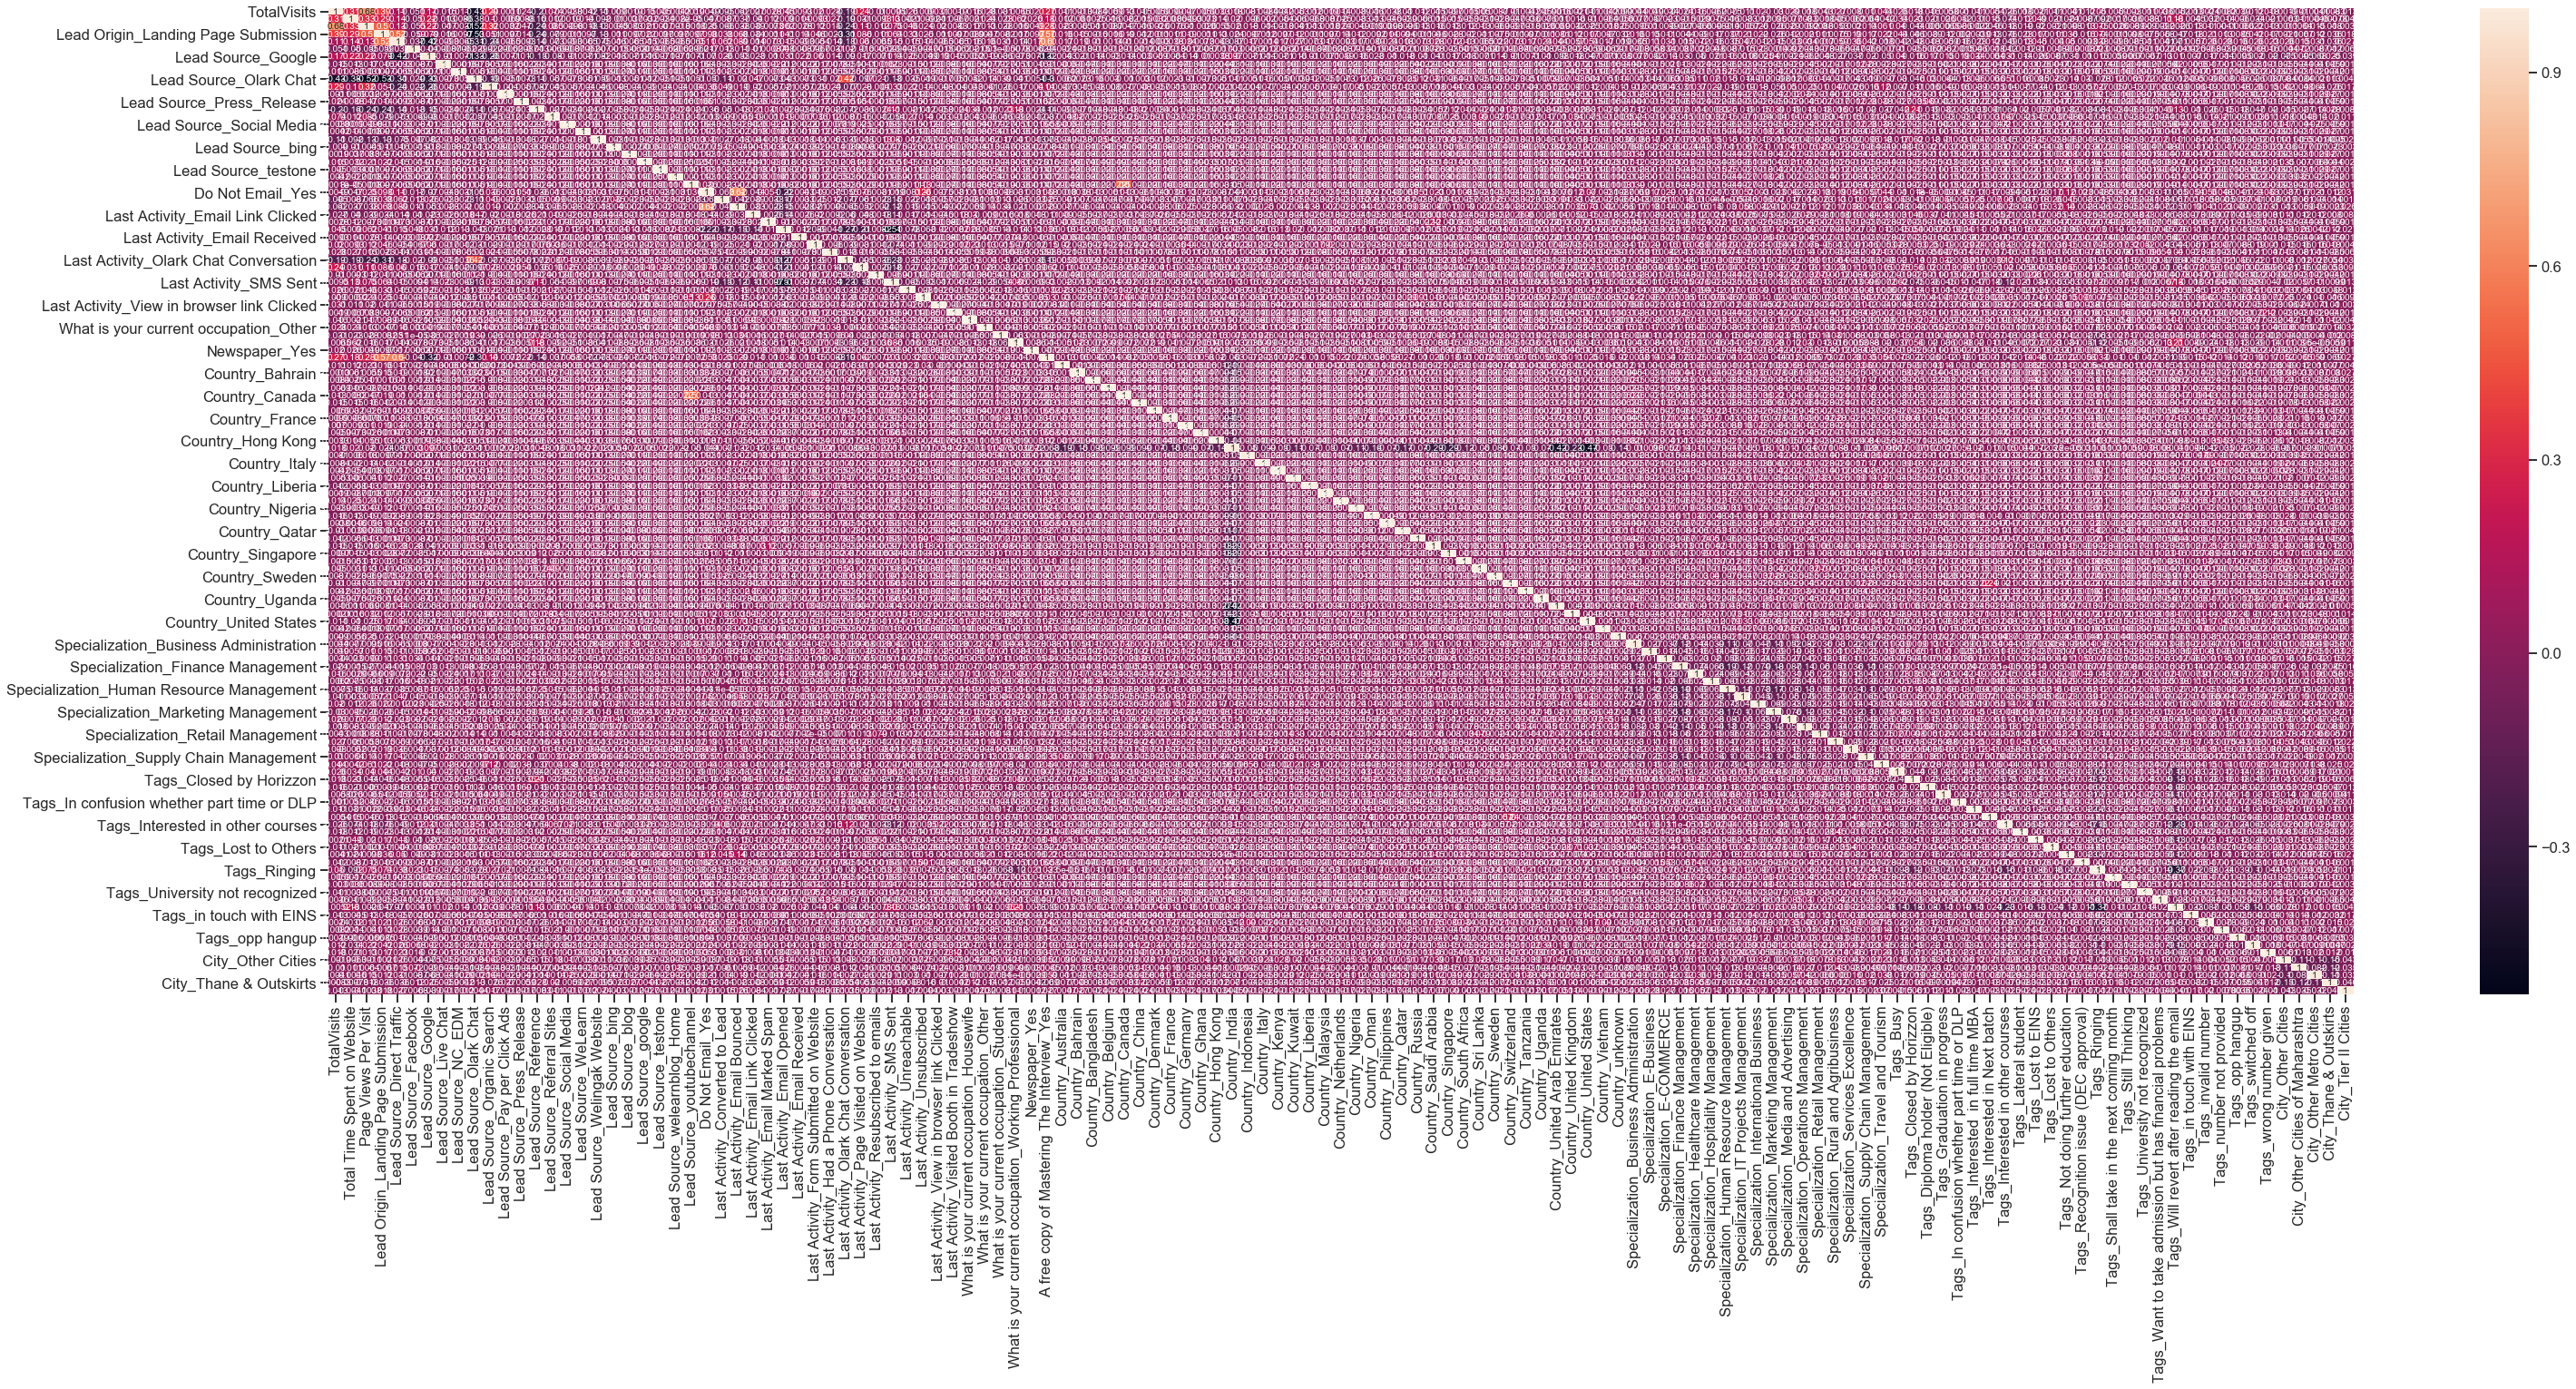

In [115]:
# # Let's see the correlation matrix 
plt.figure(figsize = (50,20))        # Size of the figure
sns.heatmap(Lead_df.corr(),annot = True)
plt.show()

In [40]:
corr_matrix = Lead_df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [41]:
sol.head(15)

Lead Origin_Lead Import                     Lead Source_Facebook                                    0.983684
Lead Origin_Lead Add Form                   Lead Source_Reference                                   0.866183
What is your current occupation_Unemployed  What is your current occupation_Working Professional    0.841425
TotalVisits                                 Page Views Per Visit                                    0.681638
Do Not Email_Yes                            Last Activity_Email Bounced                             0.622877
Lead Source_Direct Traffic                  A free copy of Mastering The Interview_Yes              0.596114
Lead Origin_Landing Page Submission         A free copy of Mastering The Interview_Yes              0.565330
                                            Lead Source_Olark Chat                                  0.528361
                                            Lead Source_Direct Traffic                              0.523412
Page Views Per Visi

In [42]:
sol.tail(10)

Lead Source_Facebook                                  What is your current occupation_Student     0.000051
Last Activity_Converted to Lead                       Specialization_Human Resource Management    0.000044
Do Not Email_Yes                                      Tags_Diploma holder (Not Eligible)          0.000040
What is your current occupation_Working Professional  City_Other Metro Cities                     0.000035
Country_India                                         Tags_Not doing further education            0.000032
Specialization_Finance Management                     Tags_Interested in other courses            0.000031
Country_Australia                                     Tags_Ringing                                0.000025
Lead Source_google                                    Tags_Ringing                                0.000014
What is your current occupation_Unemployed            Country_United Kingdom                      0.000013
                                     

In [43]:
## Dropping Highly Correlated Columns 
to_drop3=['Lead Origin_Lead Add Form','Lead Origin_Lead Import','What is your current occupation_Unemployed']
Lead_df.drop(to_drop3,axis=1,inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

y=Lead_df.pop('Converted')
X=Lead_df

In [45]:
# Splitting X, y data for test and train
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3,random_state = 100)

In [46]:
# Scaling with standardscaler 
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Lead Number  TotalVisits  Total Time Spent on Website  \
2179       638858     0.479365                    -0.661180   
3504       626930    -0.106023                    -0.096789   
5038       611456     1.942837                     1.529985   
3460       627212    -0.398718                     0.338493   
7421       592608     6.918642                    -0.487805   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
2179              1.259905                                    0   
3504              0.304949                                    1   
5038              0.066210                                    1   
3460             -0.172529                                    1   
7421              0.042336                                    1   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
2179                           0                     0                   1   
3504                           0                     0                   0   
5038                           0                     0                   1   
3460                           0                     0                   1   
7421                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
2179                      0                   0                       0   
3504                      0                   0                       0   
5038                      0                   0                       0   
3460                      0                   0                       0   
7421                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
2179                           0                              0   
3504                           1                              0   
5038                           0                              0   
3460                           0                              0   
7421                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
2179                          0                      0   
3504                          0                      0   
5038                          0                      0   
3460                          0                      0   
7421                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
2179                           0                         0   
3504                           0                         0   
5038                           0                         0   
3460                           0                         0   
7421                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
2179                    0                             0                 0   
3504                    0                             0                 0   
5038                    0                             0                 0   
3460                    0                             0                 0   
7421                    0                             0                 0   

      Lead Source_blog  Lead Source_google  Lead Source_testone  \
2179                 0                   0                    0   
3504                 0                   0                    0   
5038                 0                   0                    0   
3460                 0                   0                    0   
7421                 0                   0                    0   

      Lead Source_welearnblog_Home  Lead Source_youtubechannel  \
2179                             0                           0   
3504                             0                           0   
5038                             0                           0   
3460                             0               

In [47]:
# Storing Lead Number as keys for future use 
X_train_key=X_train.pop("Lead Number")
X_test_key=X_test.pop("Lead Number")

In [48]:
# Building first Model 
import statsmodels.api as sm

In [49]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                          128
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1994.5
Date:                Mon, 06 Jan 2020   Deviance:                       3988.9
Time:                        23:34:08   Pearson chi2:                 7.76e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     65.5520   1.72e+05      0.000      1.000   -3.37e+05    3.37e+05
TotalVisits                                                0.3821      0.058      6.546      0.000       0.268       0.496
Total Time Spent on Website                                1.0564      0.047     22.262      0.000       0.963       1.149
Page Views Per Visit                                      -0.2463      0.065     -3.783      0.000      -0.374      -0.119
Lead Origin_Landing Page Submission                       -0.2175      0.125     -1.743      0.081      -0.462       0.027
Lead Source_Direct Traffic                               -23.7874   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Facebook                                     -22.7048   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Google                                       -23.5837   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Live Chat                                      0.0269   1.55e+05   1.74e-07      1.000   -3.03e+05    3.03e+05
Lead Source_NC_EDM                                        -0.5949   1.56e+05  -3.82e-06      1.000   -3.05e+05    3.05e+05
Lead Source_Olark Chat                                   -22.8035   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Organic Search                               -23.5692   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Pay per Click Ads                            -43.9720   1.55e+05     -0.000      1.000   -3.04e+05    3.04e+05
Lead Source_Press_Release                                -43.7914   1.55e+05     -0.000      1.000   -3.03e+05    3.03e+05
Lead Source_Reference                                    -20.5555   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Referral Sites                               -24.1189   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_Social Media                                   1.4762   1.56e+05   9.47e-06      1.000   -3.05e+05    3.05e+05
Lead Source_WeLearn                                       -0.4745   1.56e+05  -3.05e-06      1.000   -3.05e+05    3.05e+05
Lead Source_Welingak Website                             -17.7481   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_bing                                         -22.7978   8.41e+04     -0.000      1.000   -1.65e+05    1.65e+05
Lead Source_blog                                         -46.2247   1.56e+05     -0.000      1.000   -3.06e+05    3.06e+05
Lead Source_google                                       -47.2721   1.01e+05     -0.000      1.000   -1.98e+05    1.98e+05
Lead Sou

In [50]:
X_key=X.pop('Lead Number')

In [51]:
# Selecting features using RFE 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [52]:
# listing the columns 
sorted(list(zip(rfe.ranking_,X_train.columns, rfe.support_)))

[(1, 'Country_Italy', True),
 (1, 'Country_Qatar', True),
 (1, 'Do Not Email_Yes', True),
 (1, 'Last Activity_Converted to Lead', True),
 (1, 'Last Activity_Olark Chat Conversation', True),
 (1, 'Last Activity_SMS Sent', True),
 (1, 'Last Activity_Unsubscribed', True),
 (1, 'Lead Source_Reference', True),
 (1, 'Lead Source_Welingak Website', True),
 (1, 'Lead Source_google', True),
 (1, 'Tags_Busy', True),
 (1, 'Tags_Closed by Horizzon', True),
 (1, 'Tags_Lost to EINS', True),
 (1, 'Tags_Will revert after reading the email', True),
 (1, 'Total Time Spent on Website', True),
 (2, 'Lead Source_Referral Sites', False),
 (3, 'Lead Source_Direct Traffic', False),
 (4, 'Lead Source_Organic Search', False),
 (5, 'Lead Source_Google', False),
 (6, 'What is your current occupation_Housewife', False),
 (7, 'Tags_Lost to Others', False),
 (8, 'What is your current occupation_Working Professional', False),
 (9, 'Country_Germany', False),
 (10, 'Tags_switched off', False),
 (11, 'Tags_Ringing', Fal

In [53]:
cols = X_train.columns[rfe.support_]
temp= X_train.columns[~rfe.support_]

In [54]:
# Rebuilding the Model with 15 featurs after RFE 
# importing libraries for building model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logml1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = logml1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2145.1
Date:                Mon, 06 Jan 2020   Deviance:                       4290.2
Time:                        23:34:11   Pearson chi2:                 7.64e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6591      0.081    -32.782      0.000      -2.818      -2.500
Total Time Spent on Website                  0.8813      0.040     22.087      0.000       0.803       0.959
Lead Source_Reference                        2.9027      0.248     11.719      0.000       2.417       3.388
Lead Source_Welingak Website                 5.5580      0.740      7.512      0.000       4.108       7.008
Lead Source_google                         -23.2485   3.23e+04     -0.001      0.999   -6.34e+04    6.33e+04
Do Not Email_Yes                            -1.8085      0.196     -9.226      0.000      -2.193      -1.424
Last Activity_Converted to Lead             -1.0646      0.217     -4.895      0.000      -1.491      -0.638
Last Activity_Olark Chat Conversation       -1.2112      0.163     -7.418      0.000      -1.531      -0.891
Last Activity_SMS Sent                       1.4735      0.089     16.543      0.000       1.299       1.648
Last Activity_Unsubscribed                   1.6262      0.529      3.073      0.002       0.589       2.663
Country_Italy                              -24.0103   4.24e+04     -0.001      1.000    -8.3e+04     8.3e+04
Country_Qatar                              -23.4843   2.23e+04     -0.001      0.999   -4.38e+04    4.38e+04
Tags_Busy                                    1.7472      0.185      9.438      0.000       1.384       2.110
Tags_Closed by Horizzon                      3.0350      0.162     18.708      0.000       2.717       3.353
Tags_Lost to EINS                            3.5463      0.214     16.570      0.000       3.127       3.966
Tags_Will revert after reading the email     3.0247      0.090     33.640      0.000       2.849       3.201
============================================================================================================
"""

In [55]:
# 'dropping column with High P-Value 
X_train_sm.drop('Lead Source_google', axis = 1, inplace  = True)
# building another model after dropping variable

logml2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logml2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2147.4
Date:                Mon, 06 Jan 2020   Deviance:                       4294.7
Time:                        23:34:11   Pearson chi2:                 7.65e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6596      0.081    -32.807      0.000      -2.818      -2.501
Total Time Spent on Website                  0.8804      0.040     22.079      0.000       0.802       0.959
Lead Source_Reference                        2.9044      0.248     11.726      0.000       2.419       3.390
Lead Source_Welingak Website                 5.5597      0.740      7.514      0.000       4.109       7.010
Do Not Email_Yes                            -1.8220      0.196     -9.308      0.000      -2.206      -1.438
Last Activity_Converted to Lead             -1.0620      0.217     -4.885      0.000      -1.488      -0.636
Last Activity_Olark Chat Conversation       -1.2089      0.163     -7.406      0.000      -1.529      -0.889
Last Activity_SMS Sent                       1.4739      0.089     16.560      0.000       1.299       1.648
Last Activity_Unsubscribed                   1.6415      0.529      3.104      0.002       0.605       2.678
Country_Italy                              -23.0086   2.57e+04     -0.001      0.999   -5.04e+04    5.03e+04
Country_Qatar                              -22.4810   1.36e+04     -0.002      0.999   -2.66e+04    2.65e+04
Tags_Busy                                    1.7477      0.185      9.442      0.000       1.385       2.110
Tags_Closed by Horizzon                      3.0358      0.162     18.713      0.000       2.718       3.354
Tags_Lost to EINS                            3.5470      0.214     16.574      0.000       3.128       3.966
Tags_Will revert after reading the email     3.0216      0.090     33.632      0.000       2.846       3.198
============================================================================================================
"""

In [56]:
# 'dropping column with High P-Valu
X_train_sm.drop('Country_Italy', axis = 1, inplace  = True)
# building another model after dropping variable

logml2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logml2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2150.1
Date:                Mon, 06 Jan 2020   Deviance:                       4300.2
Time:                        23:34:11   Pearson chi2:                 7.64e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6585      0.081    -32.811      0.000      -2.817      -2.500
Total Time Spent on Website                  0.8794      0.040     22.082      0.000       0.801       0.957
Lead Source_Reference                        2.9062      0.248     11.737      0.000       2.421       3.391
Lead Source_Welingak Website                 5.5613      0.740      7.517      0.000       4.111       7.011
Do Not Email_Yes                            -1.8183      0.196     -9.295      0.000      -2.202      -1.435
Last Activity_Converted to Lead             -1.0618      0.217     -4.885      0.000      -1.488      -0.636
Last Activity_Olark Chat Conversation       -1.2129      0.163     -7.435      0.000      -1.533      -0.893
Last Activity_SMS Sent                       1.4665      0.089     16.502      0.000       1.292       1.641
Last Activity_Unsubscribed                   1.6382      0.529      3.099      0.002       0.602       2.674
Country_Qatar                              -22.4748   1.36e+04     -0.002      0.999   -2.66e+04    2.65e+04
Tags_Busy                                    1.7502      0.185      9.461      0.000       1.388       2.113
Tags_Closed by Horizzon                      3.0320      0.162     18.719      0.000       2.714       3.349
Tags_Lost to EINS                            3.5468      0.214     16.577      0.000       3.127       3.966
Tags_Will revert after reading the email     3.0201      0.090     33.643      0.000       2.844       3.196
============================================================================================================
"""

In [57]:
# 'dropping column with High P-Value  
X_train_sm.drop('Country_Qatar', axis = 1, inplace  = True)
# building another model after dropping variable

logml2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logml2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2154.1
Date:                Mon, 06 Jan 2020   Deviance:                       4308.2
Time:                        23:34:11   Pearson chi2:                 7.65e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6586      0.081    -32.839      0.000      -2.817      -2.500
Total Time Spent on Website                  0.8800      0.040     22.119      0.000       0.802       0.958
Lead Source_Reference                        2.9101      0.247     11.759      0.000       2.425       3.395
Lead Source_Welingak Website                 5.5635      0.740      7.521      0.000       4.114       7.013
Do Not Email_Yes                            -1.8146      0.196     -9.282      0.000      -2.198      -1.431
Last Activity_Converted to Lead             -1.0589      0.217     -4.873      0.000      -1.485      -0.633
Last Activity_Olark Chat Conversation       -1.2130      0.163     -7.440      0.000      -1.532      -0.893
Last Activity_SMS Sent                       1.4634      0.089     16.489      0.000       1.289       1.637
Last Activity_Unsubscribed                   1.6377      0.528      3.099      0.002       0.602       2.673
Tags_Busy                                    1.7515      0.185      9.470      0.000       1.389       2.114
Tags_Closed by Horizzon                      3.0317      0.162     18.720      0.000       2.714       3.349
Tags_Lost to EINS                            3.5468      0.214     16.578      0.000       3.127       3.966
Tags_Will revert after reading the email     3.0144      0.090     33.622      0.000       2.839       3.190
============================================================================================================
"""

In [58]:
# Checking VIF 
# importing variance inflaction factors library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif["vif_values"] =[variance_inflation_factor(X_train_sm.values,i)for i in range(X_train_sm.shape[1])]
vif["vif_values"] = round(vif["vif_values"],2)
vif = vif.sort_values(by = "vif_values", ascending = False)
vif

Features  vif_values
0                                      const        2.86
12  Tags_Will revert after reading the email        1.21
1                Total Time Spent on Website        1.17
2                      Lead Source_Reference        1.16
7                     Last Activity_SMS Sent        1.15
10                   Tags_Closed by Horizzon        1.14
6      Last Activity_Olark Chat Conversation        1.11
4                           Do Not Email_Yes        1.10
8                 Last Activity_Unsubscribed        1.09
5            Last Activity_Converted to Lead        1.05
3               Lead Source_Welingak Website        1.04
9                                  Tags_Busy        1.04
11                         Tags_Lost to EINS        1.04

### Model Prediction 
- since we have a decent Model lets predict the probabilities and access the model

In [59]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_sm)

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)

In [61]:
# Creating a dataframe with Predicted prob and converted columns
y_train_pred_final = pd.DataFrame({"converted": y_train.values, "pred_prob_converted": y_train_pred})
y_train_pred_final.head()

converted  pred_prob_converted
0          0             0.037669
1          0             0.060436
2          0             0.212120
3          0             0.086214
4          1             0.133442

In [62]:
from sklearn import metrics

In [63]:
#choosing a random cutoff of 0.5
y_train_pred_final['predicted'] = y_train_pred_final.pred_prob_converted.map(lambda x: 1 if x >0.5 else 0)

In [64]:
y_train_pred_final.head()

converted  pred_prob_converted  predicted
0          0             0.037669          0
1          0             0.060436          0
2          0             0.212120          0
3          0             0.086214          0
4          1             0.133442          0

In [65]:
from sklearn import metrics 
Confusion  = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted)
print(Confusion)

[[3568  384]
 [ 519 1873]]


In [66]:
# Predicted     not_churn    churn
# Actual
# not_churn        3568      384
# churn            519       1873  

In [67]:
round(metrics.accuracy_score(y_train_pred_final.predicted, y_train_pred_final.converted) , 2 )

0.86

In [68]:
# Some more Metrices 

TN = Confusion[0,0] # True Negative
FP = Confusion[0,1] # False Positive
FN = Confusion[1,0] # False negative
TP = Confusion[1,1] # True Positive


# finding the accuaracy
print('Accuracy=',(TN+TP)/(TN+FP+FN+TP))
# finding the Sensitivity
print('Sencitivity =',TP/(FN+TP))
# finding the Specificity 
print('Specificity =',TN/(TN+FP))
# finding the false positive rate
print("False Positive rate =", FP/(TN+FP)) 
# finding the positive predictive value 
print("Positive pretictive value=", TP/(TP+FP))
# finding the true negative predictive value 
print("Negative predictive value=", TN/(FN+TN))


Accuracy= 0.8576607818411097
Sencitivity = 0.7830267558528428
Specificity = 0.902834008097166
False Positive rate = 0.09716599190283401
Positive pretictive value= 0.8298626495347807
Negative predictive value= 0.8730119892341571


In [69]:
# Plot the ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.pred_prob_converted, drop_intermediate = False )

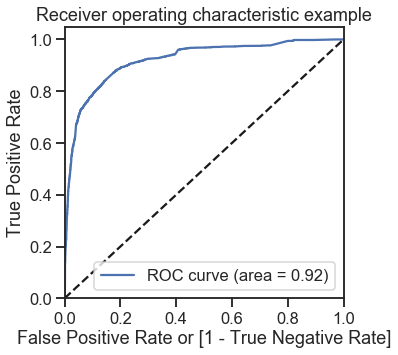

In [71]:
draw_roc( y_train_pred_final.converted, y_train_pred_final.pred_prob_converted)

In [72]:
#### Finding Optimal Cutoff Point 

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.pred_prob_converted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

converted  pred_prob_converted  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0             0.037669          0    1    0    0    0    0    0   
1          0             0.060436          0    1    0    0    0    0    0   
2          0             0.212120          0    1    1    1    0    0    0   
3          0             0.086214          0    1    0    0    0    0    0   
4          1             0.133442          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [74]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377049  1.000000  0.000000
0.1   0.1  0.723045  0.962793  0.577935
0.2   0.2  0.808480  0.911371  0.746204
0.3   0.3  0.834962  0.886706  0.803644
0.4   0.4  0.848834  0.843645  0.851974
0.5   0.5  0.857661  0.783027  0.902834
0.6   0.6  0.860813  0.733278  0.938006
0.7   0.7  0.852459  0.686455  0.952935
0.8   0.8  0.812579  0.543060  0.975709
0.9   0.9  0.752995  0.363294  0.988866


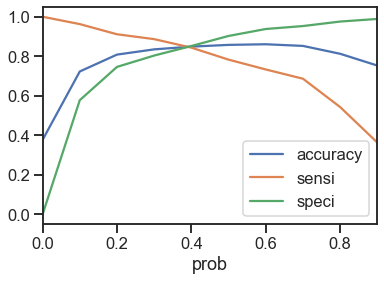

In [75]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.
## intersection of sensicitivity , specicivity and accuracy lines 
y_train_pred_final['final_predicted'] = y_train_pred_final.pred_prob_converted.map(lambda x: 1 if x >0.4 else 0)
y_train_pred_final.head()

converted  pred_prob_converted  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0             0.037669          0    1    0    0    0    0    0   
1          0             0.060436          0    1    0    0    0    0    0   
2          0             0.212120          0    1    1    1    0    0    0   
3          0             0.086214          0    1    0    0    0    0    0   
4          1             0.133442          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    0    0    0    0                0

In [77]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8488335435056746

In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3367,  585],
       [ 374, 2018]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [80]:
# finding the accuaracy
print('Accuracy=',(TN+TP)/(TN+FP+FN+TP))
# finding the Sensitivity
print('Sencitivity =',TP/(FN+TP))
# finding the Specificity 
print('Specificity =',TN/(TN+FP))
# finding the false positive rate
print("False Positive rate =", FP/(TN+FP)) 
# finding the positive predictive value 
print("Positive pretictive value=", TP/(TP+FP))
# finding the true negative predictive value 
print("Negative predictive value=", TN/(FN/TN))

Accuracy= 0.8488335435056746
Sencitivity = 0.8436454849498328
Specificity = 0.8519736842105263
False Positive rate = 0.14802631578947367
Positive pretictive value= 0.7752593161736457
Negative predictive value= 30312.00267379679


#### Precision and Recall 

In [81]:
# Precision : TP/TP+FP 

print("Precision = ",confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))

Precision =  0.7752593161736457


In [82]:
# Recall TP/TP+FN
print("Recall = ",confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Recall =  0.8436454849498328


In [83]:
# Precision and recall tradeoff 

from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.final_predicted)


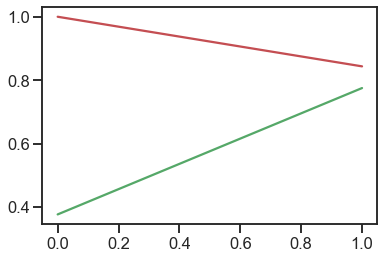

In [84]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [85]:
## Making Predicition on test set
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5121          5.0                           38                   2.5   
686           8.0                          978                   2.0   
4091          3.0                         1390                   3.0   
737           0.0                            0                   0.0   
5230          0.0                            0                   0.0   

      Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  \
5121                                    1                           1   
686                                     0                           0   
4091                                    0                           0   
737                                     0                           0   
5230                                    0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
5121                     0                   0                      0   
686                      0                   1                      0   
4091                     0                   1                      0   
737                      0                   0                      0   
5230                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
5121                   0                       0                           0   
686                    0                       0                           0   
4091                   0                       0                           0   
737                    0                       0                           0   
5230                   0                       1                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
5121                              0                          0   
686                               0                          0   
4091                              0                          0   
737                               0                          0   
5230                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
5121                      0                           0   
686                       0                           0   
4091                      0                           0   
737                       0                           0   
5230                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
5121                         0                    0   
686                          0                    0   
4091                         0                    0   
737                          0                    0   
5230                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
5121                             0                 0                 0   
686                              0                 0                 0   
4091                             0                 0                 0   
737                              1                 0                 0   
5230                             0                 0                 0   

      Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
5121                   0                    0                             0   
686                    0                    0                             0   
4091                   0                    0                             0   
737                    0                    0                             0   
5230                   0                    0                             0   

      Lead Source_youtubechannel  Do Not Email_Yes  \
5121                           0                 0   
686                            0                 0   
4091                           0                 

In [86]:
# scaling test df
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()


TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5121     0.479365                    -0.808733              0.066210   
686      1.357449                     0.925017             -0.172529   
4091    -0.106023                     1.684915              0.304949   
737     -0.984106                    -0.878821             -1.127484   
5230    -0.984106                    -0.878821             -1.127484   

      Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  \
5121                                    1                           1   
686                                     0                           0   
4091                                    0                           0   
737                                     0                           0   
5230                                    0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
5121                     0                   0                      0   
686                      0                   1                      0   
4091                     0                   1                      0   
737                      0                   0                      0   
5230                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
5121                   0                       0                           0   
686                    0                       0                           0   
4091                   0                       0                           0   
737                    0                       0                           0   
5230                   0                       1                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
5121                              0                          0   
686                               0                          0   
4091                              0                          0   
737                               0                          0   
5230                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
5121                      0                           0   
686                       0                           0   
4091                      0                           0   
737                       0                           0   
5230                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
5121                         0                    0   
686                          0                    0   
4091                         0                    0   
737                          0                    0   
5230                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
5121                             0                 0                 0   
686                              0                 0                 0   
4091                             0                 0                 0   
737                              1                 0                 0   
5230                             0                 0                 0   

      Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
5121                   0                    0                             0   
686                    0                    0                             0   
4091                   0                    0                             0   
737                    0                    0                             0   
5230                   0                    0                             0   

      Lead Source_youtubechannel  Do Not Email_Yes  \
5121                           0                 0   
686                            0                 0   
4091                           0                 

In [87]:
cols=X_train_sm.columns.tolist()
cols.remove('const')

In [88]:
x_test_sm = sm.add_constant(X_test[cols])

In [89]:
y_test_pred = res2.predict(x_test_sm)

In [90]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [91]:
# converting to dataframe 
y_test_df = pd.DataFrame(y_test)
# Putting unique id to index
y_test_df['unique id'] = y_test_df.index

In [92]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [93]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [94]:
y_pred_final.head()

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'prob_converted'})

In [95]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['unique id','Converted','prob_converted'], axis=1)

In [96]:
y_pred_final[:10]

unique id  Converted  prob_converted
0       5121          0        0.033234
1        686          1        0.763105
2       4091          1        0.864814
3        737          1        0.994210
4       5230          0        0.397072
5       5394          0        0.594098
6       7614          0        0.057958
7       5294          0        0.142459
8       2258          0        0.957714
9       8683          0        0.044427

In [97]:
y_pred_final['final_predicted'] = y_pred_final.prob_converted.map(lambda x: 1 if x > 0.4 else 0)

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.856985294117647

In [98]:
confusion_pred = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_pred

array([[1420,  258],
       [ 131,  911]], dtype=int64)

In [99]:
TP = confusion_pred[1,1] # true positive 
TN = confusion_pred[0,0] # true negatives
FP = confusion_pred[0,1] # false positives
FN = confusion_pred[1,0] # false negatives

In [100]:

# finding the accuaracy
print('Accuracy=',(TN+TP)/(TN+FP+FN+TP))
# finding the Sensitivity
print('Sencitivity =',TP/(FN+TP))
# finding the Specificity 
print('Specificity =',TN/(TN+FP))
# finding the false positive rate
print("False Positive rate =", FP/(TN+FP)) 
# finding the positive predictive value 
print("Positive pretictive value=", TP/(TP+FP))
# finding the true negative predictive value 
print("Negative predictive value=", TN/(FN+TN))
# finding the precision rate
print("Precision = ",confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))


Accuracy= 0.856985294117647
Sencitivity = 0.8742802303262955
Specificity = 0.8462455303933254
False Positive rate = 0.1537544696066746
Positive pretictive value= 0.7792985457656116
Negative predictive value= 0.915538362346873
Precision =  0.7752593161736457


In [101]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.prob_converted, drop_intermediate = False )

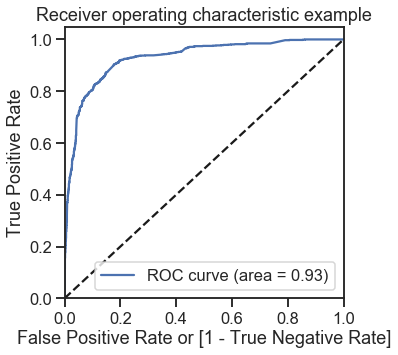

In [102]:
draw_roc( y_pred_final.Converted, y_pred_final.prob_converted)

In [103]:
## Assigning Lead Score to original data set and exporting to csv 
y_pred_final.head()

unique id  Converted  prob_converted  final_predicted
0       5121          0        0.033234                0
1        686          1        0.763105                1
2       4091          1        0.864814                1
3        737          1        0.994210                1
4       5230          0        0.397072                0

In [104]:
## combining pred test and train 
y_train_pred_final.head()

converted  pred_prob_converted  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0             0.037669          0    1    0    0    0    0    0   
1          0             0.060436          0    1    0    0    0    0    0   
2          0             0.212120          0    1    1    1    0    0    0   
3          0             0.086214          0    1    0    0    0    0    0   
4          1             0.133442          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                0  
4    0    0    0    0                0

In [105]:
y_train_a=y_train_pred_final[['converted','pred_prob_converted','final_predicted']]
y_test_a=y_pred_final[['Converted','final_predicted','final_predicted']]

In [106]:
y_test_a.columns =['converted','pred_prob_converted','final_predicted']

In [107]:
y_final_a=pd.concat([y_train_a, y_test_a], axis=0,ignore_index=True)

In [108]:
y_final_a['Lead Number']= (list(X_key))

In [109]:
y_final_a['Lead Score']=y_final_a['pred_prob_converted']*100

In [110]:
y_final_a.head()

converted  pred_prob_converted  final_predicted  Lead Number  Lead Score
0          0             0.037669                0       660737    3.766916
1          0             0.060436                0       660728    6.043620
2          0             0.212120                0       660727   21.211996
3          0             0.086214                0       660719    8.621431
4          1             0.133442                0       660681   13.344168

In [111]:
Lead_df_final=pd.merge(Lead_df_backup,y_final_a,on='Lead Number',how='outer')

In [112]:
Lead_df_final.shape

(9240, 41)

In [113]:
Lead_df_final.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [114]:
## All the Leads are assignmed with a lead score and it can be expoerted to csv and presented as well 
# Lead_df_final.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')


# Submitted By 
## Gopal Padhi
## T Prabin
## DDS13 Batch 